# Loan Prediction using  Machine Learning Algorthim

Problem

A housing company that deals in all housing loans. White in all residential, semi-white and rural areas. To obtain a loan to obtain the loan.
The company wants to automate the educational process of the loan over the Internet. These details are gender, marital status and education. A problem arose in defining customer segments to serve the service requests provided to customer service. Here they have provided a partial dataset.

____________________________________________________________________
Machine Learning Algorthim:
  1.Nearest Neighbors
  2.LogisticRegression
  3.Decision Tree
  4.Random Forest
  5.Neural Network
  6.AdaBoost
  7.Naive Bayes
  8.QDA

**Dataset Description:**

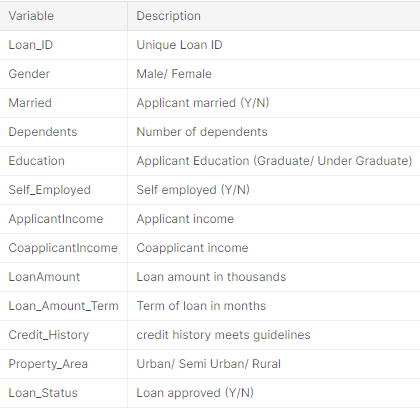

# Importing Libraries

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Loading The DataSet

In [43]:
train_df = pd.read_csv('Loan_Prediction_DataSet.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [44]:
#Data Shape
train_df.shape

(614, 13)

# Convert Categorical Values to Binary (0 and 1) 

In [45]:
dummy_Gender = pd.get_dummies(train_df['Gender'])
dummy_Gender.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [46]:
dummy_Education = pd.get_dummies(train_df['Education'])
dummy_Education.head()

,Graduate,Not Graduate
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [47]:
dummy_Married = pd.get_dummies(train_df['Married'])
dummy_Married.head()

,No,Yes
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [48]:
dummy_Property_Area = pd.get_dummies(train_df['Property_Area'])
dummy_Property_Area.head()

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [49]:
dummy_Loan_Status = pd.get_dummies(train_df['Loan_Status'])
dummy_Loan_Status.head()

,N,Y
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [50]:
df2 = pd.concat((dummy_Gender , dummy_Married) , axis=1)
df2.head()

,Female,Male,No,Yes
0,0,1,1,0
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,0,1,1,0


In [51]:
df3=pd.concat((df2 ,dummy_Education ) , axis=1)
df3.head()

,Female,Male,No,Yes,Graduate,Not Graduate
0,0,1,1,0,1,0
1,0,1,0,1,1,0
2,0,1,0,1,1,0
3,0,1,0,1,0,1
4,0,1,1,0,1,0


In [52]:
df4=pd.concat((df3,dummy_Property_Area) , axis=1)
df4.head()

,Female,Male,No,Yes,Graduate,Not Graduate,Rural,Semiurban,Urban
0,0,1,1,0,1,0,0,0,1
1,0,1,0,1,1,0,1,0,0
2,0,1,0,1,1,0,0,0,1
3,0,1,0,1,0,1,0,0,1
4,0,1,1,0,1,0,0,0,1


In [53]:
df5=pd.concat((df4 , dummy_Loan_Status) , axis=1)
df5.head()

,Female,Male,No,Yes,Graduate,Not Graduate,Rural,Semiurban,Urban,N,Y
0,0,1,1,0,1,0,0,0,1,0,1
1,0,1,0,1,1,0,1,0,0,1,0
2,0,1,0,1,1,0,0,0,1,0,1
3,0,1,0,1,0,1,0,0,1,0,1
4,0,1,1,0,1,0,0,0,1,0,1


In [54]:
final_con = pd.concat((train_df , df5) , axis=1)
final_con.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Male,No,Yes,Graduate,Not Graduate,Rural,Semiurban,Urban,N,Y
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,...,1,1,0,1,0,0,0,1,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,1,0,1,1,0,1,0,0,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,1,0,1,1,0,0,0,1,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,1,0,1,0,1,0,0,1,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,1,1,0,1,0,0,0,1,0,1


In [55]:
final_Data = final_con.drop(['Loan_ID' , 'Married' , 'Education' , 'Gender' , 'Self_Employed' , 'Loan_Status' , 'Property_Area' , 'Male' , 'Yes' , 'Not Graduate' , 'Y'] , axis=1)

In [56]:
final_Data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Female,No,Graduate,Rural,Semiurban,Urban,N
0,0,5849,0.0,NaN,360.0,1.0,0,1,1,0,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,0,0,1,1,0,0,1
2,0,3000,0.0,66.0,360.0,1.0,0,0,1,0,0,1,0
3,0,2583,2358.0,120.0,360.0,1.0,0,0,0,0,0,1,0
4,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,1,0


In [57]:
final_Data.rename(columns= {"Female":"Gender" , "No":"Married" , "Graduate":"Education" , "N":"Loan_Status"})

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Rural,Semiurban,Urban,Loan_Status
0,0,5849,0.0,NaN,360.0,1.0,0,1,1,0,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,0,0,1,1,0,0,1
2,0,3000,0.0,66.0,360.0,1.0,0,0,1,0,0,1,0
3,0,2583,2358.0,120.0,360.0,1.0,0,0,0,0,0,1,0
4,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,1,1,1,1,0,0,0
610,3+,4106,0.0,40.0,180.0,1.0,0,0,1,1,0,0,0
611,1,8072,240.0,253.0,360.0,1.0,0,0,1,0,0,1,0
612,2,7583,0.0,187.0,360.0,1.0,0,0,1,0,0,1,0


In [58]:
final_Data.tail()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Female,No,Graduate,Rural,Semiurban,Urban,N
609,0,2900,0.0,71.0,360.0,1.0,1,1,1,1,0,0,0
610,3+,4106,0.0,40.0,180.0,1.0,0,0,1,1,0,0,0
611,1,8072,240.0,253.0,360.0,1.0,0,0,1,0,0,1,0
612,2,7583,0.0,187.0,360.0,1.0,0,0,1,0,0,1,0
613,0,4583,0.0,133.0,360.0,0.0,1,1,1,0,1,0,1


# Data Cleaning

In [59]:
#Checking The Missing Values
final_Data.isnull()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Female,No,Graduate,Rural,Semiurban,Urban,N
0,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [60]:
final_Data.isnull().sum()

Dependents           15
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Female                0
No                    0
Graduate              0
Rural                 0
Semiurban             0
Urban                 0
N                     0
dtype: int64

In [61]:
final_Data['LoanAmount'] = final_Data['LoanAmount'].fillna(final_Data['LoanAmount'].mean())

In [62]:
final_Data['Credit_History'] = final_Data['Credit_History'].fillna(final_Data['Credit_History'].median())

In [63]:
final_Data.isnull().sum()

Dependents           15
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Female                0
No                    0
Graduate              0
Rural                 0
Semiurban             0
Urban                 0
N                     0
dtype: int64

In [64]:
final_Data.dropna(inplace = True)

In [65]:
final_Data.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Female               0
No                   0
Graduate             0
Rural                0
Semiurban            0
Urban                0
N                    0
dtype: int64

In [66]:
#Data Set Shape 
final_Data.shape

(586, 13)

In [67]:
#Data Visualization Libiraries
import seaborn as sns
import matplotlib.pyplot as plt


In [68]:
final_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         586 non-null    object 
 1   ApplicantIncome    586 non-null    int64  
 2   CoapplicantIncome  586 non-null    float64
 3   LoanAmount         586 non-null    float64
 4   Loan_Amount_Term   586 non-null    float64
 5   Credit_History     586 non-null    float64
 6   Female             586 non-null    uint8  
 7   No                 586 non-null    uint8  
 8   Graduate           586 non-null    uint8  
 9   Rural              586 non-null    uint8  
 10  Semiurban          586 non-null    uint8  
 11  Urban              586 non-null    uint8  
 12  N                  586 non-null    uint8  
dtypes: float64(4), int64(1), object(1), uint8(7)
memory usage: 36.1+ KB


# Spliting The DataSet To Train and Test Set

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x=final_Data.iloc[1:586,1:12].values

In [71]:
y=final_Data.iloc[1:586 ,12].values

In [72]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [73]:
final_Data.dtypes.sample(10)

Rural                 uint8
Loan_Amount_Term    float64
ApplicantIncome       int64
Female                uint8
Credit_History      float64
Urban                 uint8
LoanAmount          float64
Dependents           object
N                     uint8
Graduate              uint8
dtype: object

# Machine Learning Algorthim

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

In [75]:

h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "LogisticRegression",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(solver='liblinear', C=1.0 , penalty='l1', random_state=33 , max_iter=1000),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

# iterate over datasets

In [76]:
# iterate over classifiers
for name, clf in zip(names, classifiers):
        #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    y_pred = clf.predict(x_test)
    print("------------",name," Classfier----------------")
    print(classification_report(y_test, y_pred))
    print(score)
  


------------ Nearest Neighbors  Classfier----------------
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       114
           1       0.47      0.26      0.33        62

    accuracy                           0.64       176
   macro avg       0.57      0.55      0.54       176
weighted avg       0.60      0.64      0.60       176

0.6363636363636364
------------ LogisticRegression  Classfier----------------
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       114
           1       0.88      0.34      0.49        62

    accuracy                           0.75       176
   macro avg       0.80      0.66      0.66       176
weighted avg       0.78      0.75      0.71       176

0.75
------------ Decision Tree  Classfier----------------
              precision    recall  f1-score   support

           0       0.73      0.92      0.82       114
           1       0.73      0.39      0.5

C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
